# Mandatory Challenge
## Context
You work in the data analysis team of a very important company. On Monday, the company shares some good news with you: you just got hired by a major retail company! So, let's get prepared for a huge amount of work!

Then you get to work with your team and define the following tasks to perform:   
1. You need to start your analysis using data from the past.  
2. You need to define a process that takes your daily data as an input and integrates it.  

You are in charge of the second part, so you are provided with a sample file that you will have to read daily. To complete you task, you need the following aggregates:
* One aggregate per store that adds up the rest of the values.
* One aggregate per item that adds up the rest of the values.

You can import the dataset `retail_sales` from Ironhack's database. 

## Your task
Therefore, your process will consist of the following steps:
1. Read the sample file that a daily process will save in your folder. 
2. Clean up the data.
3. Create the aggregates.
4. Write three tables in your local database: 
    - A table for the cleaned data.
    - A table for the aggregate per store.
    - A table for the aggregate per item.

## Instructions
* Read the csv you can find in Ironhack's database.
* Clean the data and create the aggregates as you consider.
* Create the tables in your local database.
* Populate them with your process.

## Import DB and Libraries

In [1]:
# your code here
from sqlalchemy import create_engine
import pandas as pd
import numpy as np 

driver = 'mysql+pymysql'
user = 'ironhacker_read'
password = 'ir0nhack3r'
ip = '35.239.232.23'
database = 'retail_sales'

In [2]:
connection_string = f"{driver}://{user}:{password}@{ip}/{database}"

engine = create_engine(connection_string)

In [3]:
query1 = """ SELECT * FROM raw_sales
"""
query2 = """ SELECT * FROM sales_by_item
"""
query3 = """ SELECT * FROM sales_by_shop
"""

## Raw_sales table

####  Check for type and anomalies in description of data

In [4]:
raw_sales = pd.read_sql(query1, engine)
raw_sales.info()
raw_sales.to_csv("./raw_sales.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545 entries, 0 to 4544
Data columns (total 5 columns):
date            4545 non-null datetime64[ns]
shop_id         4545 non-null int64
item_id         4545 non-null int64
item_price      4545 non-null float64
item_cnt_day    4545 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 177.6 KB


In [5]:
raw_sales.describe()
# assume all values outside of UQ + (IQR*1.5) are outliers and should be removed
# upper boundry = 2606 

# df_test = raw_sales[raw_sales["item_price"]>2606]
# print(df_test.shape, raw_sales.shape)


,shop_id,item_id,item_price,item_cnt_day
count,4545.000000,4545.000000,4545.000000,4545.000000
mean,34.021122,11140.459406,1031.686121,1.103630
std,16.565517,6558.649572,2073.919990,0.536967
min,2.000000,30.000000,3.000000,-1.000000
25%,22.000000,4977.000000,249.000000,1.000000
50%,31.000000,11247.000000,479.000000,1.000000
75%,50.000000,16671.000000,1192.000000,1.000000
max,59.000000,22162.000000,27990.000000,10.000000


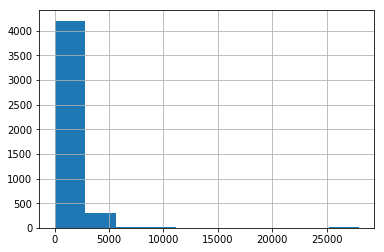

In [27]:
# we wanted to see the distribution of the item price, to see the ranges we are handeling and if there are any outliers in
# our data. This is especially useful when looking at the next tables as the std of sales by store is quite large. 
import matplotlib.pyplot as plt
raw_sales["item_price"].hist()

In [37]:
# as we have outliers at over 25000, we will drop them to remove any skeweness in the other tables
# price range seems very big. however, we do not know if this is correct or not as no infromation 
#has been given to us about what items are being sold. 

raw_sales_clean = raw_sales[raw_sales["item_price"]<2606]
raw_sales_clean.head()


,date,shop_id,item_id,item_price,item_cnt_day
0,2015-01-04,29,1469,1199.0,1.0
1,2015-01-04,28,21364,479.0,1.0
2,2015-01-04,28,21365,999.0,2.0
3,2015-01-04,28,22104,249.0,2.0
4,2015-01-04,28,22091,179.0,1.0


####  Clean data: Raw_sales

In [8]:
# remove the min -1 value -- consider it a return of a product. 
# no further changes needed in the table - we assume it is now clean 


In [38]:
raw_sales_clean.to_csv("./raw_sales_clean.csv", sep = ",")

## Sales_by_item table


####  Check for type and anomalies in description of data

In [10]:
sales_by_item = pd.read_sql(query2, engine)
sales_by_item.head()
sales_by_item.to_csv("./sales_by_item.csv", sep = ",")

#####  Changes in types 

In [11]:
sales_by_item = sales_by_item.astype({"date": "datetime64[ns]"})

In [12]:
sales_by_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 4 columns):
item_id             2955 non-null int64
item_earnings       2955 non-null float64
total_items_sold    2955 non-null float64
date                2955 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 92.4 KB


In [13]:
## see how much each item cost, remove outliers as we did in the previous table
sales_by_item["price_per_unit"]= sales_by_item["item_earnings"]/sales_by_item["total_items_sold"]

# sales_by_item_clean = sales_by_item[sales_by_item["price_per_unit"]<2606]
# sales_by_item_clean.head()

## Sales by store

#### Check for type and anomalies in description of data

In [14]:
sales_by_store = pd.read_sql(query3, engine)
sales_by_store.head()
sales_by_store.to_csv("./sales_by_shop.csv", sep = ",")

##### Changes in types 

In [15]:
sales_by_store = sales_by_store.astype({"date": "datetime64[ns]"})

In [16]:
# check all types have been corrected
sales_by_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
shop_id             90 non-null int64
shop_earnings       90 non-null float64
total_items_sold    90 non-null float64
date                90 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 2.9 KB


In [17]:
# check in describe if data is more or less realistic 
# the std is very big... does not seem realisitc, 
# however when loking at the prices of the items, the price ranges form 100 to 2000

sales_by_store.describe()

,shop_id,shop_earnings,total_items_sold
count,90.000000,90.000000,90.000000
mean,32.311111,34733.432741,37.155556
std,17.621262,25449.615414,28.852165
min,2.000000,3095.000000,6.000000
25%,18.000000,15703.000000,20.000000
50%,34.000000,28579.000000,26.000000
75%,48.000000,45106.000000,50.000000
max,59.000000,109288.000000,134.000000


## Aggreations

In [23]:
# aggregation of sales of items per store to the date 
sales_by_store_agg = sales_by_store.groupby("shop_id").sum()

sales_by_store_agg.head()

,shop_earnings,total_items_sold
shop_id,,
2,66047.0,54.0
3,44962.0,22.0
4,19574.0,26.0
5,22092.0,30.0
6,77568.0,100.0


In [24]:
sales_by_store_agg.to_csv("./sales_by_shop_agg.csv")

In [26]:
# aggregation of sales of each item to the date 
sales_by_item_agg = sales_by_item.groupby("item_id").sum()

sales_by_item_agg.head()

,item_earnings,total_items_sold,price_per_unit
item_id,,,
30,507.0,3.0,507.0
31,1089.0,3.0,1089.0
32,447.0,3.0,447.0
42,897.0,3.0,897.0
59,747.0,3.0,747.0


In [ ]:
sales_by_item_agg.to_csv("./sales_by_item_agg.csv")

# CSV export to local database

In [ ]:
# local workbench

In [29]:
driver = "mysql+pymysql"
user = "root"
password = "fubifubi"
ip = "localhost"
database = "lab_df_calc"

In [30]:
connection_string = f"{driver}://{user}:{password}@{ip}/{database}"

engine = create_engine(connection_string)

In [43]:
sales_by_item.to_sql("sales_item", engine)

InternalError: (pymysql.err.InternalError) (1054, "Unknown column 'inf' in 'field list'")
[SQL: INSERT INTO sales_item (`index`, item_id, item_earnings, total_items_sold, date, price_per_unit) VALUES (%(index)s, %(item_id)s, %(item_earnings)s, %(total_items_sold)s, %(date)s, %(price_per_unit)s)]
[parameters: ({'index': 0, 'item_id': 30, 'item_earnings': 169.0, 'total_items_sold': 1.0, 'date': datetime.datetime(2019, 3, 9, 0, 0), 'price_per_unit': 169.0}, {'index': 1, 'item_id': 31, 'item_earnings': 363.0, 'total_items_sold': 1.0, 'date': datetime.datetime(2019, 3, 9, 0, 0), 'price_per_unit': 363.0}, {'index': 2, 'item_id': 32, 'item_earnings': 149.0, 'total_items_sold': 1.0, 'date': datetime.datetime(2019, 3, 9, 0, 0), 'price_per_unit': 149.0}, {'index': 3, 'item_id': 42, 'item_earnings': 299.0, 'total_items_sold': 1.0, 'date': datetime.datetime(2019, 3, 9, 0, 0), 'price_per_unit': 299.0}, {'index': 4, 'item_id': 59, 'item_earnings': 249.0, 'total_items_sold': 1.0, 'date': datetime.datetime(2019, 3, 9, 0, 0), 'price_per_unit': 249.0}, {'index': 5, 'item_id': 74, 'item_earnings': 499.0, 'total_items_sold': 1.0, 'date': datetime.datetime(2019, 3, 9, 0, 0), 'price_per_unit': 499.0}, {'index': 6, 'item_id': 109, 'item_earnings': 249.0, 'total_items_sold': 1.0, 'date': datetime.datetime(2019, 3, 9, 0, 0), 'price_per_unit': 249.0}, {'index': 7, 'item_id': 259, 'item_earnings': 249.0, 'total_items_sold': 1.0, 'date': datetime.datetime(2019, 3, 9, 0, 0), 'price_per_unit': 249.0}  ... displaying 10 of 2955 total bound parameter sets ...  {'index': 2953, 'item_id': 22140, 'item_earnings': 217.5, 'total_items_sold': 1.0, 'date': datetime.datetime(2019, 3, 12, 0, 0), 'price_per_unit': 217.5}, {'index': 2954, 'item_id': 22162, 'item_earnings': 1995.0, 'total_items_sold': 6.0, 'date': datetime.datetime(2019, 3, 12, 0, 0), 'price_per_unit': 332.5})]
(Background on this error at: http://sqlalche.me/e/2j85)

In [41]:
raw_sales_clean.to_sql("raw_sales", engine)

In [42]:
sales_by_store.to_sql("sales_shop", engine)